# Tedarik Zinciri Maliyeti Analizi

Bu notebook, EOQ (Ekonomik Sipariş Miktarı) yöntemi kullanarak tedarik zinciri maliyetlerini analiz etmektedir.

## 1. Gerekli Kütüphaneleri İçe Aktar

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Grafiklerin türkçe karakterleri düzgün göstermesi için
plt.rcParams['font.family'] = 'DejaVu Sans'

## 2. Tedarik Zinciri Veri Seti Oluştur

Ürünler (A, B, C, D, E) için aşağıdaki parametreleri içeren veri seti oluşturuyoruz:
- **D (Yıllık Talep)**: 1000 ile 5000 arasında rastgele
- **S (Sipariş Verme Maliyeti)**: 50 ile 200 arasında
- **H (Birim Taşıma/Bulundurma Maliyeti)**: 2 ile 10 arasında

In [2]:
# Rastgele sayı üreticisini sabitlemek için
np.random.seed(42)

# Ürünler
urunler = ['A', 'B', 'C', 'D', 'E']

# Veri seti oluştur
veri = {
    'Ürün': urunler,
    'Yıllık Talep (D)': np.random.randint(1000, 5001, len(urunler)),
    'Sipariş Maliyeti (S)': np.random.randint(50, 201, len(urunler)),
    'Birim Taşıma Maliyeti (H)': np.random.uniform(2, 10, len(urunler)).round(2)
}

df = pd.DataFrame(veri)
print("Veri Seti:")
print(df)

Veri Seti:
  Ürün  Yıllık Talep (D)  Sipariş Maliyeti (S)  Birim Taşıma Maliyeti (H)
0    A              4174                   121                       5.67
1    B              4507                    70                       4.67
2    C              1860                   152                       3.14
3    D              2294                   171                       7.21
4    E              2130                   124                       2.45


## 3. EOQ (Ekonomik Sipariş Miktarı) Hesapla

EOQ formülü: $Q = \sqrt{\frac{2DS}{H}}$

Burada:
- D = Yıllık talep
- S = Sipariş verme maliyeti
- H = Birim taşıma/bulundurma maliyeti

In [3]:
# EOQ Hesaplama Fonksiyonu
def calculate_eoq(row):
    """EOQ formülünü kullanarak ekonomik sipariş miktarını hesapla"""
    D = row['Yıllık Talep (D)']
    S = row['Sipariş Maliyeti (S)']
    H = row['Birim Taşıma Maliyeti (H)']
    
    eoq = np.sqrt((2 * D * S) / H)
    return eoq

# EOQ değerlerini hesapla ve DataFrame'e ekle
df['EOQ'] = df.apply(calculate_eoq, axis=1).round(2)
print("\nEOQ Değerleri:")
print(df[['Ürün', 'Yıllık Talep (D)', 'Sipariş Maliyeti (S)', 'Birim Taşıma Maliyeti (H)', 'EOQ']])


EOQ Değerleri:
  Ürün  Yıllık Talep (D)  Sipariş Maliyeti (S)  Birim Taşıma Maliyeti (H)  \
0    A              4174                   121                       5.67   
1    B              4507                    70                       4.67   
2    C              1860                   152                       3.14   
3    D              2294                   171                       7.21   
4    E              2130                   124                       2.45   

      EOQ  
0  422.08  
1  367.58  
2  424.35  
3  329.87  
4  464.34  


## 4. Toplam Maliyetleri Hesapla

Tedarik zinciri toplam maliyeti iki bileşenden oluşur:

1. **Sipariş Maliyeti (Ordering Cost)**: $\frac{D}{Q} \times S$
2. **Elde Tutma Maliyeti (Holding Cost)**: $\frac{Q}{2} \times H$

**Toplam Maliyet**: Sipariş Maliyeti + Elde Tutma Maliyeti

In [4]:
# Maliyet Hesaplama Fonksiyonları
def calculate_ordering_cost(row):
    """Sipariş Maliyeti = (D / Q) * S"""
    D = row['Yıllık Talep (D)']
    S = row['Sipariş Maliyeti (S)']
    Q = row['EOQ']
    
    ordering_cost = (D / Q) * S
    return ordering_cost

def calculate_holding_cost(row):
    """Elde Tutma Maliyeti = (Q / 2) * H"""
    Q = row['EOQ']
    H = row['Birim Taşıma Maliyeti (H)']
    
    holding_cost = (Q / 2) * H
    return holding_cost

# Maliyetleri hesapla ve DataFrame'e ekle
df['Sipariş Maliyeti ($)'] = df.apply(calculate_ordering_cost, axis=1).round(2)
df['Elde Tutma Maliyeti ($)'] = df.apply(calculate_holding_cost, axis=1).round(2)
df['Toplam Maliyet ($)'] = (df['Sipariş Maliyeti ($)'] + df['Elde Tutma Maliyeti ($)']).round(2)

print("\nMaliyet Analizi:")
print(df[['Ürün', 'Sipariş Maliyeti ($)', 'Elde Tutma Maliyeti ($)', 'Toplam Maliyet ($)']])


Maliyet Analizi:
  Ürün  Sipariş Maliyeti ($)  Elde Tutma Maliyeti ($)  Toplam Maliyet ($)
0    A               1196.58                  1196.60             2393.18
1    B                858.29                   858.30             1716.59
2    C                666.24                   666.23             1332.47
3    D               1189.18                  1189.18             2378.36
4    E                568.81                   568.82             1137.63


## 5. Sonuçları Görselleştir

Her ürünün toplam tedarik zinciri maliyetini gösteren bir çubuk grafik çiziyoruz.

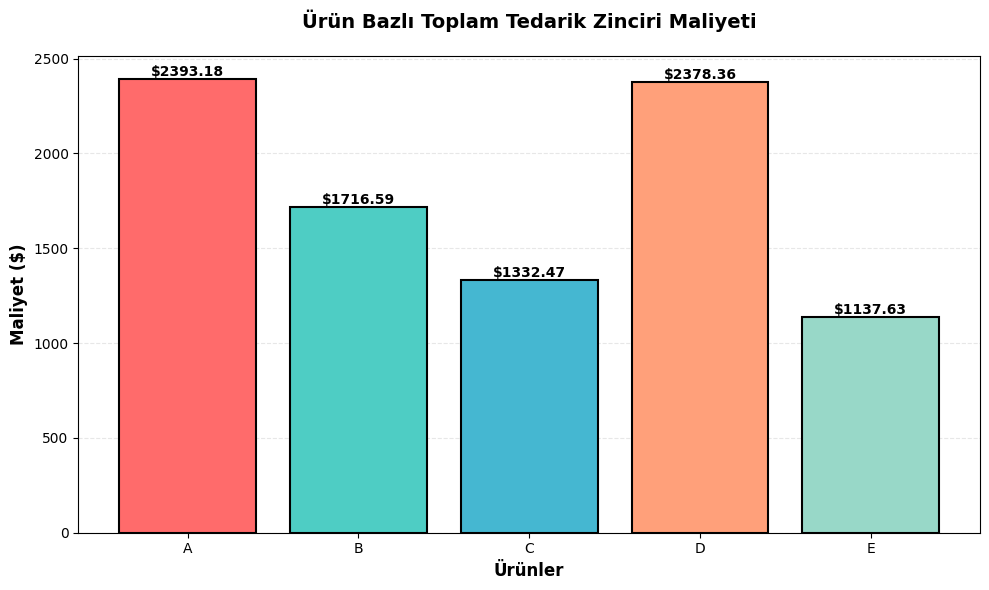


Grafik başarıyla oluşturuldu!


In [5]:
# Görselleştirme
fig, ax = plt.subplots(figsize=(10, 6))

# Çubuk grafik çiz
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A', '#98D8C8']
bars = ax.bar(df['Ürün'], df['Toplam Maliyet ($)'], color=colors, edgecolor='black', linewidth=1.5)

# Başlık ve eksen etiketleri
ax.set_title('Ürün Bazlı Toplam Tedarik Zinciri Maliyeti', fontsize=14, fontweight='bold', pad=20)
ax.set_xlabel('Ürünler', fontsize=12, fontweight='bold')
ax.set_ylabel('Maliyet ($)', fontsize=12, fontweight='bold')

# Çubuk üzerine değer yazı
for bar in bars:
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height,
            f'${height:.2f}',
            ha='center', va='bottom', fontsize=10, fontweight='bold')

# Grid ekle
ax.grid(axis='y', alpha=0.3, linestyle='--')
ax.set_axisbelow(True)

# Düzen
plt.tight_layout()
plt.show()

print("\nGrafik başarıyla oluşturuldu!")

## 6. Analiz Sonuçlarını Yazdır

In [6]:
# DataFrame'in ilk 5 satırını yazdır
print("=" * 80)
print("TEDARİK ZİNCİRİ ANALIZI - ÖZET SONUÇLAR")
print("=" * 80)
print("\nDataFrame (Tüm Veriler):")
print(df.to_string())

# Önemli istatistikleri yazdır
print("\n" + "=" * 80)
print("ÖNEMLİ İSTATİSTİKLER")
print("=" * 80)

print(f"\nEn Düşük Toplam Maliyet: ${df['Toplam Maliyet ($)'].min():.2f} ({df.loc[df['Toplam Maliyet ($)'].idxmin(), 'Ürün']} Ürünü)")
print(f"En Yüksek Toplam Maliyet: ${df['Toplam Maliyet ($)'].max():.2f} ({df.loc[df['Toplam Maliyet ($)'].idxmax(), 'Ürün']} Ürünü)")
print(f"Ortalama Toplam Maliyet: ${df['Toplam Maliyet ($)'].mean():.2f}")
print(f"\nToplam Tedarik Zinciri Maliyeti: ${df['Toplam Maliyet ($)'].sum():.2f}")

print("\n" + "=" * 80)
print("ÜRÜN BAZLI DETAYLI ANALİZ")
print("=" * 80)
for idx, row in df.iterrows():
    print(f"\n{row['Ürün']} Ürünü:")
    print(f"  • Yıllık Talep: {row['Yıllık Talep (D)']:.0f} birim")
    print(f"  • Sipariş Maliyeti: ${row['Sipariş Maliyeti (S)']:.0f}")
    print(f"  • Birim Taşıma Maliyeti: ${row['Birim Taşıma Maliyeti (H)']:.2f}")
    print(f"  • EOQ: {row['EOQ']:.2f} birim")
    print(f"  • Sipariş Maliyeti Toplam: ${row['Sipariş Maliyeti ($)']:.2f}")
    print(f"  • Elde Tutma Maliyeti Toplam: ${row['Elde Tutma Maliyeti ($)']:.2f}")
    print(f"  • Toplam Maliyet: ${row['Toplam Maliyet ($)']:.2f}")

TEDARİK ZİNCİRİ ANALIZI - ÖZET SONUÇLAR

DataFrame (Tüm Veriler):
  Ürün  Yıllık Talep (D)  Sipariş Maliyeti (S)  Birim Taşıma Maliyeti (H)     EOQ  Sipariş Maliyeti ($)  Elde Tutma Maliyeti ($)  Toplam Maliyet ($)
0    A              4174                   121                       5.67  422.08               1196.58                  1196.60             2393.18
1    B              4507                    70                       4.67  367.58                858.29                   858.30             1716.59
2    C              1860                   152                       3.14  424.35                666.24                   666.23             1332.47
3    D              2294                   171                       7.21  329.87               1189.18                  1189.18             2378.36
4    E              2130                   124                       2.45  464.34                568.81                   568.82             1137.63

ÖNEMLİ İSTATİSTİKLER

En Düşük Toplam M

## Duyarlılık Analizi: Sipariş Maliyeti (S) Arttıkça Toplam Maliyet

Ortalama D: 2993.00, Ortalama H: 4.63
En düşük toplam maliyet: $1176.93 iken S = 50


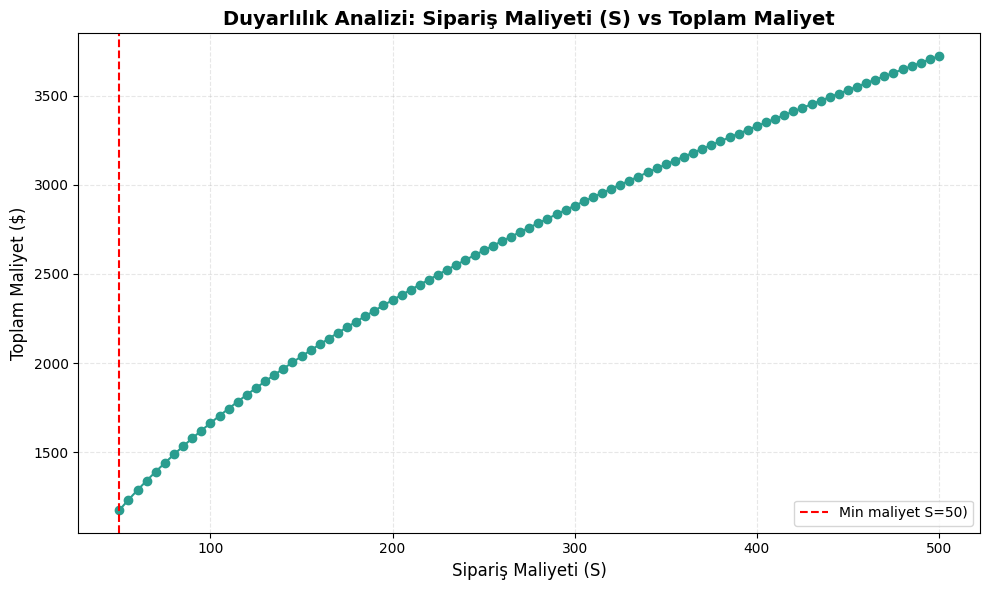

,S,Toplam Maliyet
0,50,1176.93
1,55,1234.37
2,60,1289.26
3,65,1341.90
4,70,1392.56


In [7]:
# Duyarlılık Analizi
# Sipariş maliyeti S 50'den 500'e kadar değişecek.
# Talep (D) ve Tutma maliyeti (H) sabit — DataFrame'den ortalama değerleri alıyoruz.

D_avg = df['Yıllık Talep (D)'].mean()
H_avg = df['Birim Taşıma Maliyeti (H)'].mean()

S_values = np.arange(50, 501, 5)  # 50,55,...,500

total_costs = []

for S_val in S_values:
    Q = np.sqrt((2 * D_avg * S_val) / H_avg)
    ordering_cost = (D_avg / Q) * S_val
    holding_cost = (Q / 2) * H_avg
    total = ordering_cost + holding_cost
    total_costs.append(total)

# Basit DataFrame ile sonuçları özetleyelim
sensitivity_df = pd.DataFrame({'S': S_values, 'Toplam Maliyet': np.round(total_costs, 2)})

# En düşük maliyetin hangi S değerinde olduğunu bul
min_idx = sensitivity_df['Toplam Maliyet'].idxmin()
min_row = sensitivity_df.loc[min_idx]

print(f"Ortalama D: {D_avg:.2f}, Ortalama H: {H_avg:.2f}")
print(f"En düşük toplam maliyet: ${min_row['Toplam Maliyet']:.2f} iken S = {int(min_row['S'])}")

# Çizgi grafiği çiz
fig, ax = plt.subplots(figsize=(10,6))
ax.plot(sensitivity_df['S'], sensitivity_df['Toplam Maliyet'], marker='o', linestyle='-', color='#2A9D8F')
ax.axvline(min_row['S'], color='red', linestyle='--', label=f'Min maliyet S={int(min_row["S"])})')
ax.set_title('Duyarlılık Analizi: Sipariş Maliyeti (S) vs Toplam Maliyet', fontsize=14, fontweight='bold')
ax.set_xlabel('Sipariş Maliyeti (S)', fontsize=12)
ax.set_ylabel('Toplam Maliyet ($)', fontsize=12)
ax.grid(alpha=0.3, linestyle='--')
ax.legend()
plt.tight_layout()
plt.show()

# İlk birkaç satırı göster
sensitivity_df.head()

## Dinamik EOQ ve Toplam Maliyet Analizi (Etkileşimli Widget ile)

In [8]:
import ipywidgets as widgets
from ipywidgets import interact
import numpy as np
import matplotlib.pyplot as plt

# Dinamik Fonksiyon: Slider'lar değiştikçe bu fonksiyon tekrar çalışacak
def dinamik_analiz(Yillik_Talep, Siparis_Maliyeti, Tasima_Maliyeti):
    # Verilen parametrelere göre EOQ hesapla
    Q = np.sqrt((2 * Yillik_Talep * Siparis_Maliyeti) / Tasima_Maliyeti)
    # Toplam Maliyet Hesabı
    toplam_maliyet = (Yillik_Talep / Q) * Siparis_Maliyeti + (Q / 2) * Tasima_Maliyeti
    # Grafik Çizimi
    plt.figure(figsize=(10, 6))
    # X ekseni için farklı Sipariş Miktarı (Q) senaryoları (Optimal Q'nun etrafı)
    Q_range = np.linspace(Q * 0.5, Q * 1.5, 100) 
    # Bu Q değerlerine karşılık gelen maliyet eğrisi
    maliyet_egrisi = (Yillik_Talep / Q_range) * Siparis_Maliyeti + (Q_range / 2) * Tasima_Maliyeti
    plt.plot(Q_range, maliyet_egrisi, label='Toplam Maliyet Eğrisi', color='blue')
    plt.axvline(x=Q, color='red', linestyle='--', label=f'Optimal EOQ: {int(Q)}')
    plt.scatter([Q], [toplam_maliyet], color='red', s=100) # Optimal noktayı işaretle
    plt.title(f"Dinamik Maliyet Analizi\nGüncel Toplam Maliyet: ${toplam_maliyet:,.2f}")
    plt.xlabel('Sipariş Miktarı (Q)')
    plt.ylabel('Maliyet ($)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.show()

# Slider'ları Oluştur (Min, Max ve Başlangıç değerleri)
interact(dinamik_analiz, 
         Yillik_Talep=widgets.IntSlider(min=1000, max=10000, step=100, value=3000, description="Talep (D)"),
         Siparis_Maliyeti=widgets.IntSlider(min=10, max=500, step=10, value=100, description="Sipariş ($)"),
         Tasima_Maliyeti=widgets.FloatSlider(min=0.5, max=10.0, step=0.1, value=2.5, description="Taşıma ($)"))

interactive(children=(IntSlider(value=3000, description='Talep (D)', max=10000, min=1000, step=100), IntSlider…

<function __main__.dinamik_analiz(Yillik_Talep, Siparis_Maliyeti, Tasima_Maliyeti)>